# Importing network with all words

In [1]:
# Load augmented_network from creating_new_network.ipynb
# (Make sure you've run that notebook first and saved the pickle file)

import pickle
with open('augmented_network.pkl', 'rb') as f:
    augmented_network = pickle.load(f)

# Verify it loaded correctly
print(f"Loaded augmented_network:")
print(f"  Nodes: {len(augmented_network['nodes'])}")
print(f"  Edges: {augmented_network['graph'].number_of_edges():,}")
print(f"  Distance matrix shape: {augmented_network['distance_matrix'].shape}")


Loaded augmented_network:
  Nodes: 526
  Edges: 56,917
  Distance matrix shape: (526, 526)


# **MODEL TRAINING**

# **MODEL TESTING**

/Users/voodoo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loading best model from best_model.pth...
✅ Loaded embeddings for 523 words
   Embedding dimension: 64

📊 CIFAR-100 Coverage: 100/100 words in model

EMBEDDING ANALYSIS

EMBEDDING ANALYSIS

Vocabulary: 523  Embedding dim: 64

Similarity stats (100 word sample):
  Mean: 0.1762  Std: 0.1768
  Min: -0.3125  Max: 0.9439

NEAREST NEIGHBORS

Most similar to 'bear':
  elephant         similarity=0.7084
  sheep            similarity=0.5707
  bridge           similarity=0.5682
  mouse            similarity=0.5597
  zebra            similarity=0.5556
  giraffe          similarity=0.5531
  ball             similarity=0.5439
  cloud            similarity=0.5417

Most similar to 'elephant':
  bear             similarity=0.7084
  bridge           similarity=0.6197
  cloud            similarity=0.5944
  zebra            similarity=0.5854
  area             similarity=0.5777
  bottle           similarity=0.5512
  giraffe          similarity=0.5286
  stone            similarity=0.5268

Most similar to 

/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:843: RuntimeWarning: divide by zero encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:843: RuntimeWarning: overflow encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:843: RuntimeWarning: invalid value encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:781: RuntimeWarning: divide by zero encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:781: RuntimeWarning: overflow encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:781: RuntimeWarning: invalid value encountered in matmul
  similarities = 

Saved t-SNE to embeddings_tsne.png

📈 Displaying t-SNE visualization:


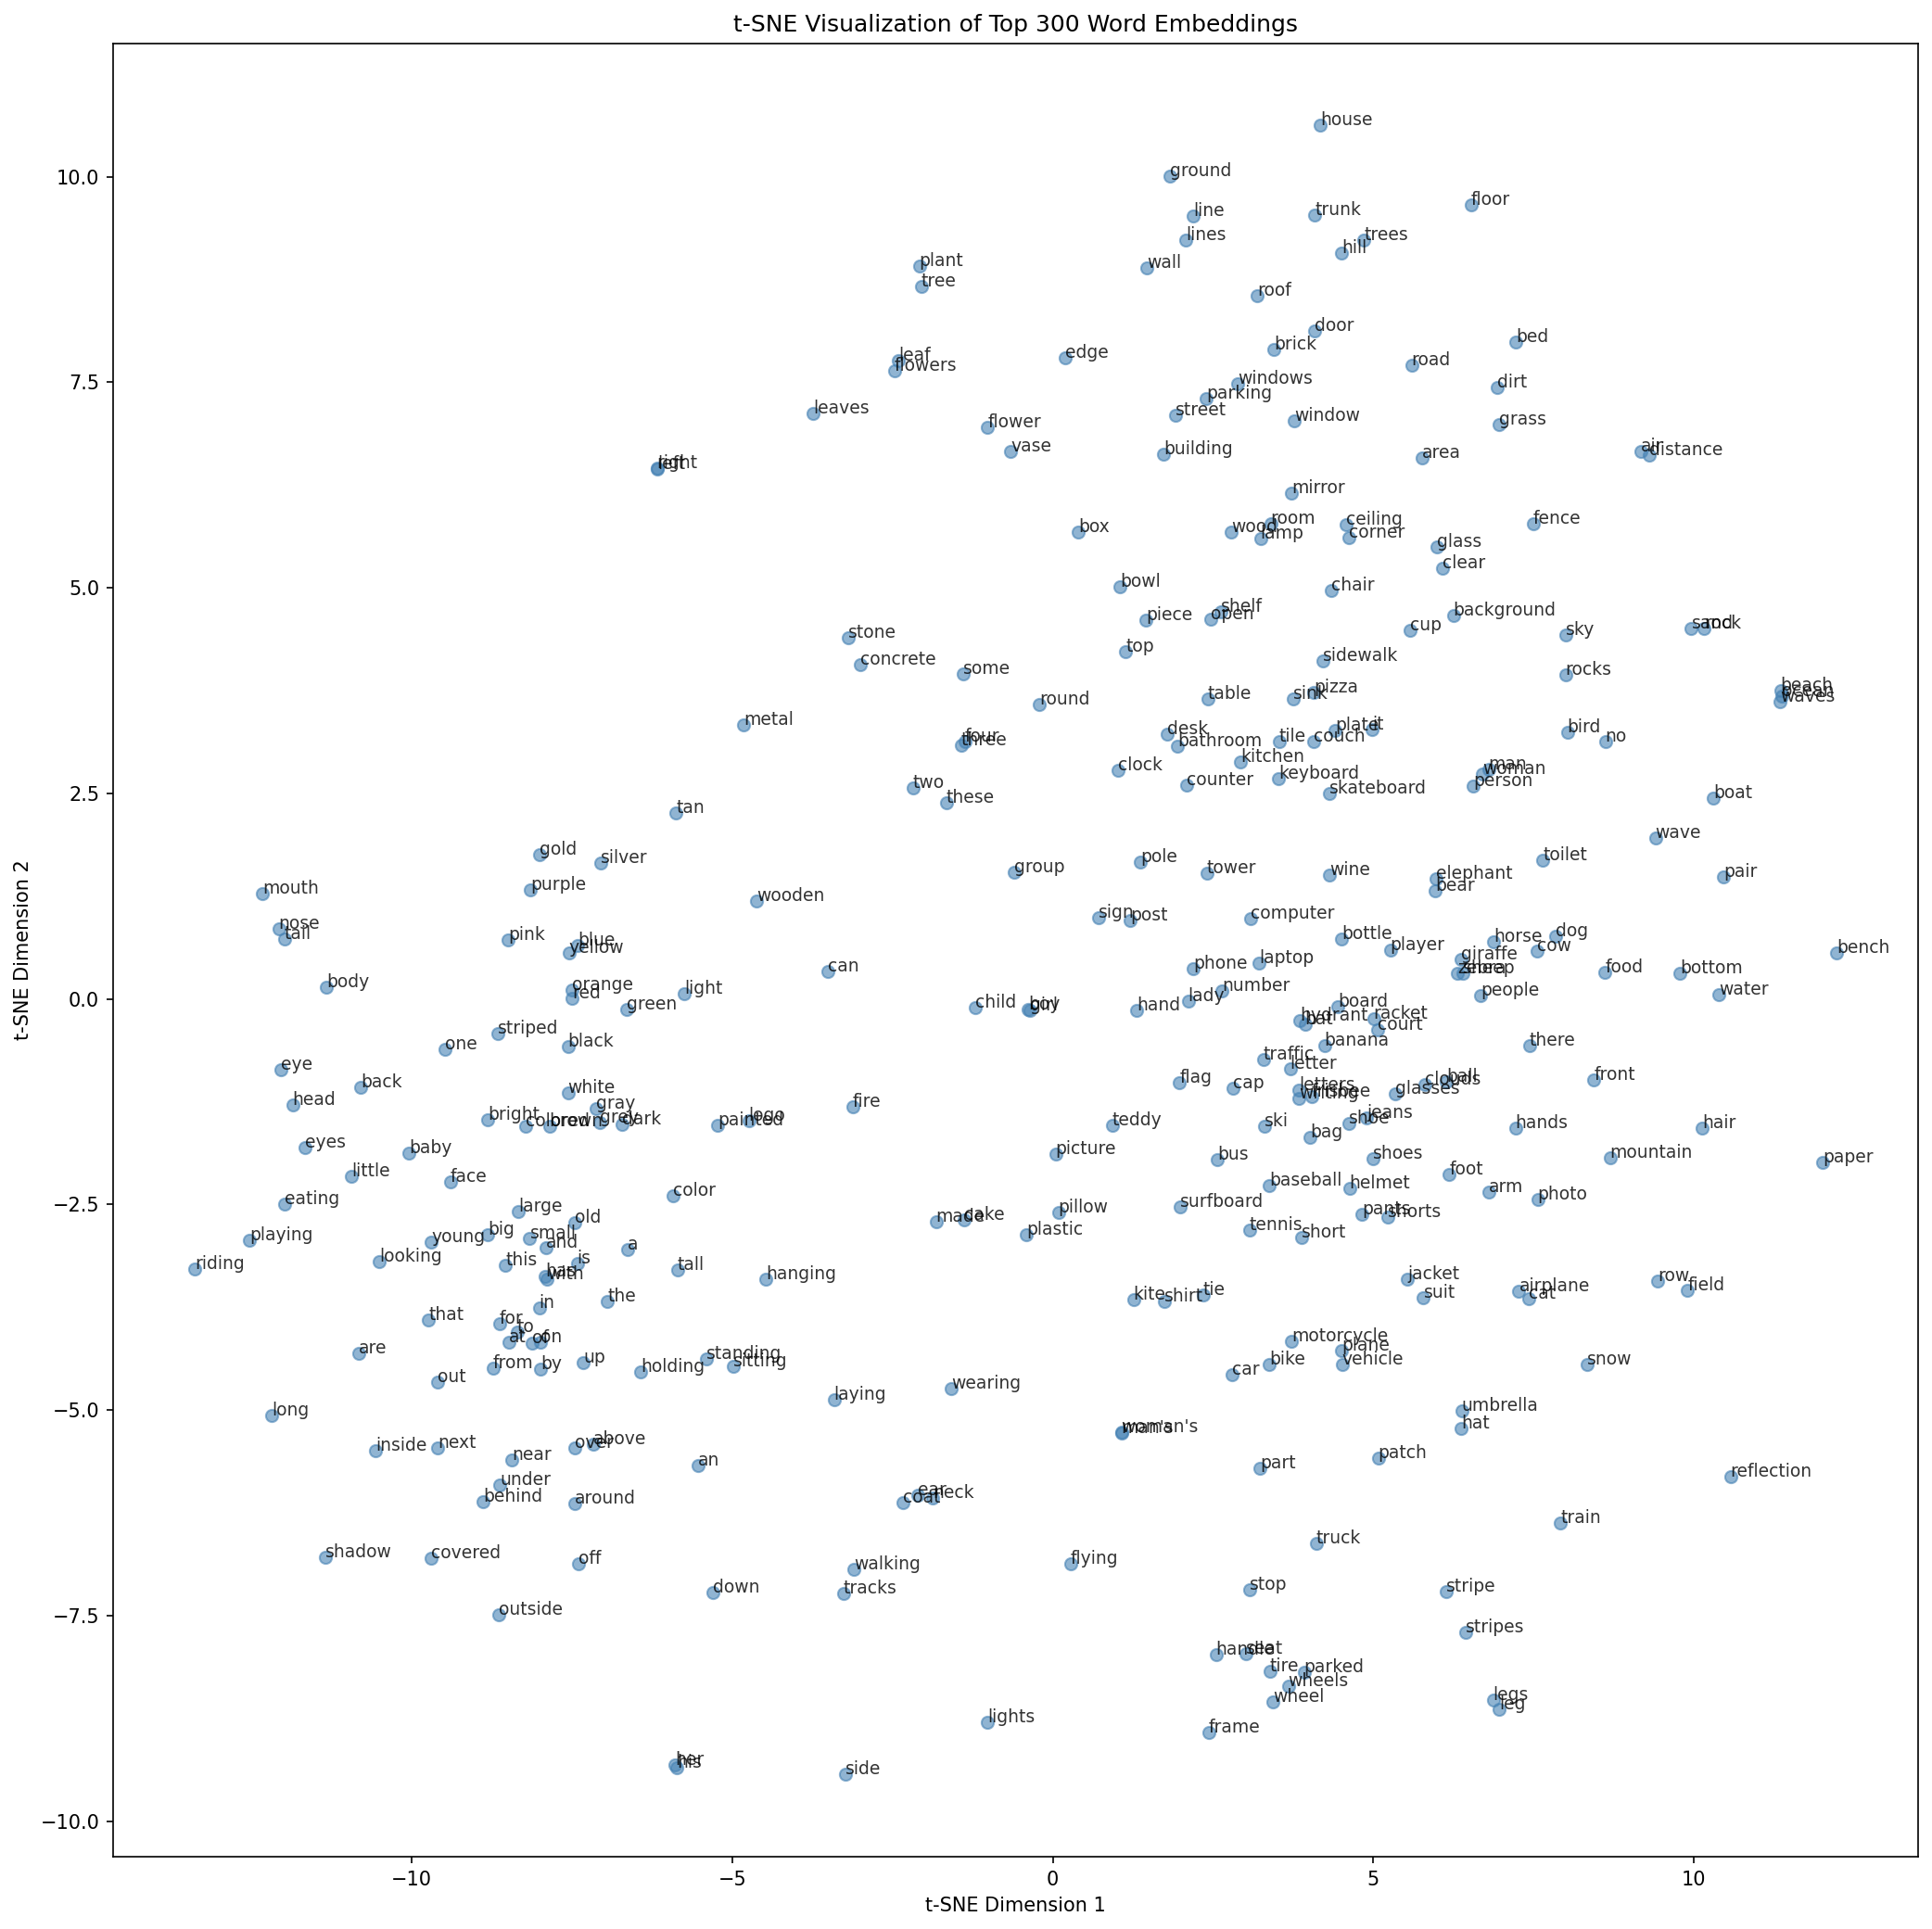

test_contexts_built (lab6.TestSkipGramDataset)
Test that contexts are built correctly. ... ok
test_getitem_returns_triplet (lab6.TestSkipGramDataset)
Test that __getitem__ returns correct format. ... ok
test_pairs_generated (lab6.TestSkipGramDataset)
Test that pairs are generated. ... ok
test_embeddings_initialized (lab6.TestSkipGramModel)
Test that embeddings are initialized. ... ok
test_forward_returns_loss (lab6.TestSkipGramModel)
Test that forward pass returns loss. ... ok
test_get_embeddings_returns_numpy (lab6.TestSkipGramModel)
Test that get_embeddings returns numpy array. ... ok
test_dataset_model_compatibility (lab6.TestIntegration)
Test that dataset output works with model input. ... 


🧪 UNIT TESTS
RUNNING SKIP-GRAM UNIT TESTS

✅ ALL TESTS PASSED!
Total tests run: 7
✅ All tests passed!


ok

----------------------------------------------------------------------
Ran 7 tests in 0.010s

OK


In [2]:
# Load best_model.pth and analyze embeddings
# ============================================================================

from lab6 import analyze_embeddings, visualize_embeddings, SkipGramModel, run_tests
import torch
import os
import numpy as np
from IPython.display import Image, display

# --- 1. Load Best Model ---
model_path = 'best_model.pth'
if os.path.exists(model_path):
    print(f"Loading best model from {model_path}...")
    checkpoint = torch.load(model_path)
    nodes = checkpoint['nodes']

    # Reconstruct model to get embeddings
    model = SkipGramModel(checkpoint['vocab_size'], checkpoint['embedding_dim'])
    model.load_state_dict(checkpoint['model_state_dict'])
    embeddings = model.get_embeddings()

    print(f"✅ Loaded embeddings for {len(nodes):,} words")
    print(f"   Embedding dimension: {embeddings.shape[1]}")
else:
    raise FileNotFoundError(f"{model_path} not found. Please train the model first.")

# --- 2. Check CIFAR-100 Coverage ---
import torchvision
cifar100 = torchvision.datasets.CIFAR100(root='./data', download=True)
cifar_words = set(cifar100.classes)
model_vocab = set(nodes)
cifar_in_model = cifar_words & model_vocab

print(f"\n📊 CIFAR-100 Coverage: {len(cifar_in_model)}/100 words in model")
if len(cifar_in_model) < 100:
    missing = sorted(cifar_words - model_vocab)
    print(f"   Missing: {missing[:10]}..." if len(missing) > 10 else f"   Missing: {missing}")

# --- 3. Qualitative Analysis ---
print("\n" + "="*80)
print("EMBEDDING ANALYSIS")
print("="*80)

# Test with CIFAR-100 words that should be in the model
cifar_test_words = [w for w in ['apple', 'bear', 'bicycle', 'bus', 'cat', 'dog', 
                                 'elephant', 'house', 'mountain', 'train', 'tiger',
                                 'lion', 'whale', 'butterfly', 'snake', 'turtle'] 
                    if w in model_vocab]

analyze_embeddings(
    nodes=nodes,
    embeddings=embeddings,

    # Nearest neighbors - mix of VG words and CIFAR-100 words
    similarity_examples=[
        # CIFAR-100 animals (if present)
        *[w for w in ['bear', 'elephant', 'tiger', 'lion', 'whale', 'butterfly', 
                      'snake', 'turtle', 'rabbit', 'fox', 'wolf'] if w in model_vocab][:6],
        # VG common words
        "man", "woman", "car", "tree", "building", "water",
        # Colors
        "red", "blue", "green", "white",
    ],

    # Analogies
    analogy_examples=[
        ("man", "woman", "boy"),           # → girl?
        ("red", "apple", "yellow"),        # → banana?
        ("dog", "cat", "horse"),           # → cow?
        ("car", "road", "boat"),           # → water?
    ],

    # Semantic clusters - include CIFAR words
    cluster_seeds=[
        *[w for w in ['bear', 'elephant', 'lion', 'tiger', 'cat', 'dog'] if w in model_vocab][:4],
        "car", "bus", "train", "bicycle",
        "red", "blue", "green", "yellow",
    ]
)

# --- 4. t-SNE Visualization ---
print("\n" + "="*80)
print("t-SNE VISUALIZATION")
print("="*80)

tsne_file = "embeddings_tsne.png"
visualize_embeddings(
    nodes,
    embeddings,
    output_file=tsne_file,
    sample_size=min(300, len(nodes)),
    annotate=True
)

if os.path.exists(tsne_file):
    print(f"\n📈 Displaying t-SNE visualization:")
    display(Image(filename=tsne_file, width=800))

# --- 5. Run Unit Tests ---
print("\n" + "="*80)
print("🧪 UNIT TESTS")
print("="*80)

success = run_tests()
if success:
    print("✅ All tests passed!")
else:
    print("❌ Some tests failed.")
